Creaeted to plot the output of coherence_test.py. May be edited to plot other versions of similar output from other files.

In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [23]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160312000048.pkl"
file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160314083848.pkl"
with open(file, "rb") as f:
    load_dict = pickle.load(f)
load_dict.keys()

dict_keys(['detection_significance', 'eig_estimates'])

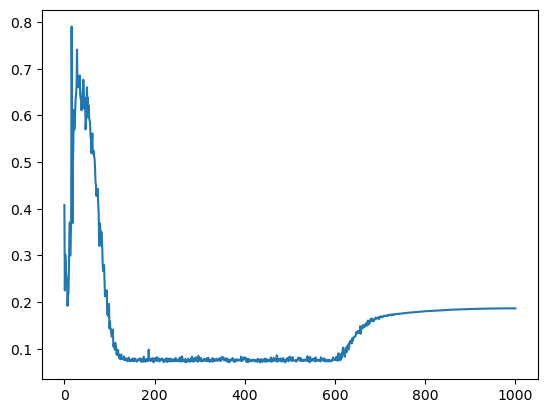

In [24]:
data = load_dict["detection_significance"]
plt.plot(data)

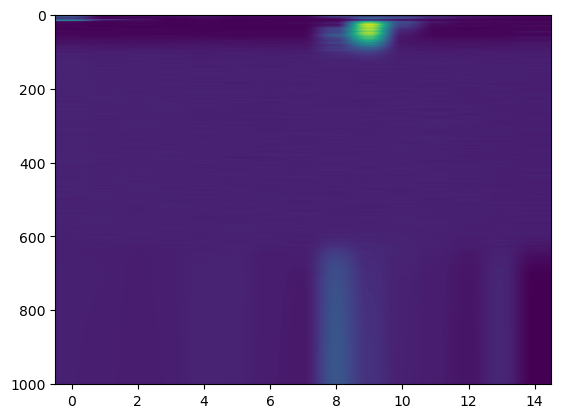

In [25]:
# np.append(data[np.newaxis], data[np.newaxis], axis=0).shape
eig_vals = load_dict["eig_estimates"]
# eig_vals.shape

plt.imshow(eig_vals, aspect="auto")